In [26]:
%matplotlib inline

import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

style.use("ggplot")

dataset = datasets.load_wine()

X = dataset.data
y = dataset.target
features = dataset.data.T

Prediction:		Actual:			Accuracy:
alcohol   		alcohol   		96.3%
ash       		ash       		92.59%
malic_acid		malic_acid		90.74%
alcohol   		alcohol   		94.44%
ash       		malic_acid		94.44%
malic_acid		malic_acid		98.15%
Average Accuracy: 95.28%
Misclassifications: 2 out of 50 examples


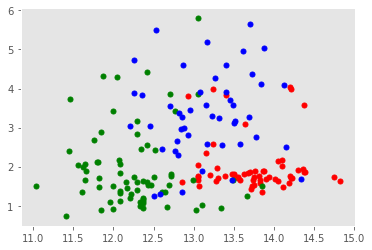

In [27]:

class SupportVectorClassifier(object):
    def __init__(self, dataset, X, y, n_iter=45):
        self.X = X
        self.y = y
        self.dataset = dataset
        self.n_iter = n_iter
        
        self.classes = list(dataset.feature_names)
        self.model = SVC(kernel="linear", C=3)
        self.results = []
        self.predictions = []
        self.misclassifications = 0
        
        self.train_model()
    
    def train_model(self):
        self.results.append("Prediction:\t\tActual:\t\t\tAccuracy:")
        for i in range(self.n_iter):
            X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.3)        
            self.model.fit(X_train, y_train)

            pred = self.model.predict(X_test)
            if self.classes[pred[i]] != self.classes[y_test[i]]:
                self.misclassifications += 1
                
            acc = round(accuracy_score(y_test, pred) * 100, 2)
            self.predictions.append(acc)
            
            self.results.append(f"{self.classes[pred[i]].ljust(10)}\t\t{self.classes[y_test[i]].ljust(10)}\t\t{acc}%")

    def average_accuracy(self):
        self.predictions = sorted(self.predictions)
        scaled_data = self.predictions[5:-5]
        return round(sum(scaled_data) / len(scaled_data), 2)
    
    def plot_data(self):
        a, b, c = features[:3]
        j = np.vstack((a, b, c)).T
        
        colors = ("r.", "g.", "b.")
        fig = plt.figure() 
        ax = fig.add_subplot(111)
        plt.grid()
        for i in range(len(j)):
            ax.plot(j[i][0], j[i][1], colors[self.y[i]], markersize=10)


if __name__ == "__main__":
    model = SupportVectorClassifier(dataset, X, y, n_iter=50)
    model.plot_data()
    [print(model.results[i]) for i in range(7)]
    print(f"Average Accuracy: {model.average_accuracy()}%")
    print(f"Misclassifications: {model.misclassifications} out of {model.n_iter} examples")